# Understanding Descriptive Statistics

Import the necessary libraries here:

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [89]:
rolling = lambda : pd.DataFrame([random.choices([1,2,3,4,5,6]) for i in range(10)])

In [90]:
dice = rolling()
dice

,0
0,5
1,5
2,3
3,4
4,1
5,1
6,1
7,3
8,1
9,6


In [91]:
dice.columns=['roll']
dice

,roll
0,5
1,5
2,3
3,4
4,1
5,1
6,1
7,3
8,1
9,6


#### 2.- Plot the results sorted by value.

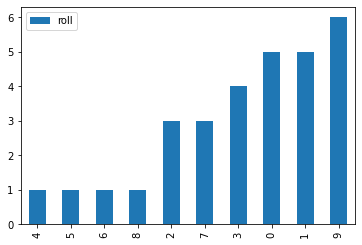

In [92]:
dice.sort_values(by='roll').plot.bar();

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='roll'>

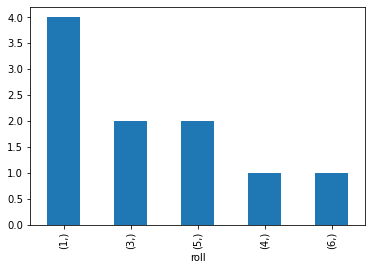

In [93]:
frequ = dice.value_counts()
frequ.plot.bar()

In [94]:
"""
The fisrt plot shows the 10 attempts rolling the dice and the second one shows the frequency of each number of the dice
in 10 rolling times.
"""

'\nThe fisrt plot shows the 10 attempts rolling the dice and the second one shows the frequency of each number of the dice\nin 10 rolling times.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [95]:
own_mean = lambda x: sum(x)/len(x)

In [96]:
own_mean(dice['roll'].to_list())

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [97]:
freq = dice.value_counts()
freq_ind= freq.reset_index()
freq_ind.columns= ['rolls', 'freq']
freq_ind

,rolls,freq
0,1,4
1,3,2
2,5,2
3,4,1
4,6,1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [98]:
def median(val):
    
    """
    Input: list of values
    Ouput: median value of input list
    """
    
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    
    else:
        return val[int(len(val)/2)]

In [99]:
median(sorted(dice['roll'].to_list()))

3.0

In [100]:
sorted(dice['roll'].to_list())

[1, 1, 1, 1, 3, 3, 4, 5, 5, 6]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [101]:
def quartiles(vals):
    
    half = median(vals)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

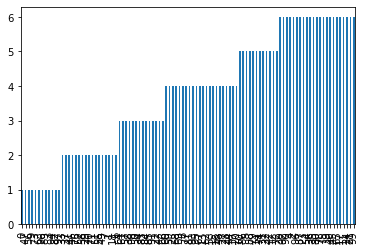

In [102]:
ciendice = pd.read_csv(r'./roll_the_dice_hundred.csv')
ciendice['value'].sort_values().plot.bar();

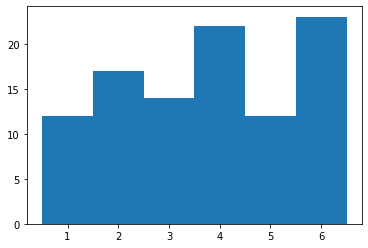

In [103]:
dice_values = sorted(ciendice['value'])
plt.hist(dice_values, bins=6, range= (0.5, 6.5));

In [104]:
""""
It seems the most common number is 4 and 6
"""


'"\nIt seems the most common number is 4 and 6\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [105]:
ciendice.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


In [114]:
print(median(dice_values))

4.0


#### 3.- Now, calculate the frequency distribution.


In [109]:
freq = ciendice['value'].value_counts()
freq_dist = freq.reset_index()
freq_dist.columns = ['value', 'times']
freq_dist.sort_values(by='value', inplace=True)
freq_dist

,value,times
4,1,12
2,2,17
3,3,14
1,4,22
5,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

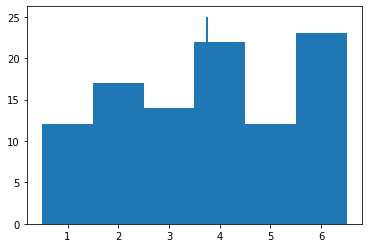

In [117]:
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
plt.vlines(ciendice['value'].mean(), ymin=0, ymax=25, lw=2);

In [ ]:
"""
The values are slightly left skewed because it should be 4
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

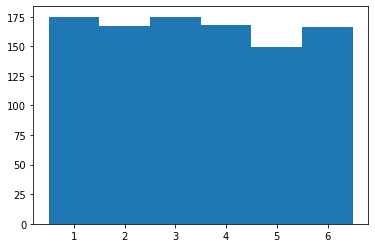

In [121]:
thousand = pd.read_csv('./roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6, range= (0.5, 6.5));

In [ ]:
"""
It's pretty close to a uniform distribution, meaning that pretty much every value happens the same number of times. 
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

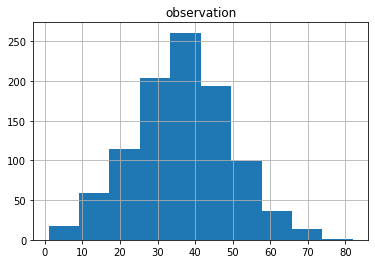

In [123]:
ages1 = pd.read_csv('./ages_population.csv')
ages1.hist();

In [124]:
"""
I think the mean would be between 30-40 and the standard deviation around 10-15
"""

'\nI think the mean would be between 30-40 and the standard deviation around 10-15\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [125]:
print(ages1.observation.mean())
print(ages1.observation.std())

36.56
12.816499625976762


In [ ]:
"""
Absolutely yeah
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

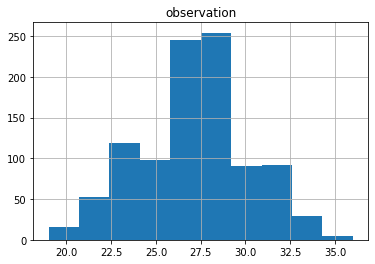

In [127]:
ages2 = pd.read_csv('./ages_population2.csv')
ages2.hist();

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [128]:
"""
There's a imp difference: this distribution is significantly narrower than the first one. Ages go from 17 to 37
On the previous one was from 0 to ~80
"""

"\nThere's a imp difference: this distribution is significantly narrower than the first one. Ages go from 17 to 37\nOn the previous one was from 0 to ~80\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [129]:
print(ages2.observation.mean())
print(ages2.observation.std())

27.155
2.969813932689186


In [130]:
print(quartiles(ages2.observation.sort_values()))
ages2.describe()

(25.0, 27.0, 29.0)


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [131]:
"""
younger population and lower std dev as I said 
"""

'\nyounger population and lower std dev as I said \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

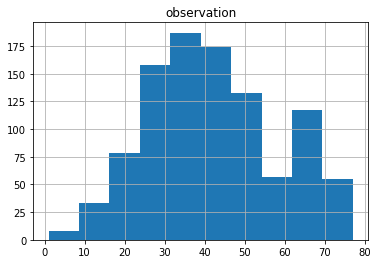

In [134]:
ages3 = pd.read_csv('./ages_population3.csv')
ages3.hist();

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [135]:
print(ages3.observation.mean())
print(ages3.observation.std())

41.989
16.144705959865934


In [136]:
"""
There're a little second peak in between 60 and 70s. We could say it's kinda binomial distribution 
"""

"\nThere're a little second peak in between 60 and 70s. We could say it's kinda binomial distribution \n"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [137]:
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))

30.0
40.0
53.0


In [138]:
"""
Not a huge difference
"""

'\nNot a huge difference\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'